## Build test data

We'll use a star with a clear sinusoidal signal and multiple sectors for complete coverage on the different data types for targets that require TPF content.

We'll also generate a clear and a failure mode synthetic light curve for testing the detection methods.

We'll choose a single-sector star for download testing.

In [1]:
from fleck import generate_spots, Star
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')

In [2]:
np.random.seed(802)
N = 2
spot_contrast = np.random.uniform(0.5, 1., size=N)
rotation_period = np.random.uniform(1.5, 27., size=N)/5
u_ld = [0.5, 0.2]

spot_radius = np.random.uniform(0.05, 0.15, size=N)
min_latitude = np.random.uniform(30, 60, size=N)
max_latitude = np.random.uniform(61, 85, size=N)

t = np.arange(0, 27., 0.02)
yerr = 1e-6*np.array([5000, 100])

n_phases = len(t)
n_inclinations = 1
n_spots = np.random.uniform(10, 30, size=N).astype(int)

In [3]:
np.random.seed(802)

sim = np.zeros((N, len(t)))
obs = np.zeros((N, len(t)))

for idx in range(N):
    lons, lats, radii, inc_stellar = generate_spots(min_latitude[idx], max_latitude[idx],
                                                   spot_radius[idx], n_spots[idx],
                                                   n_inclinations=n_inclinations)
    star = Star(spot_contrast = spot_contrast[idx], n_phases=n_phases, 
                u_ld = u_ld, rotation_period = rotation_period[idx])
    lc = star.light_curve(lons, lats, radii, inc_stellar, times=t)
    
    lc -= np.mean(lc)
    lc += 1.
    
    sim[idx, :] = lc.flatten()
    obs[idx, :] = lc.flatten() + yerr[idx] * np.random.randn(len(t))


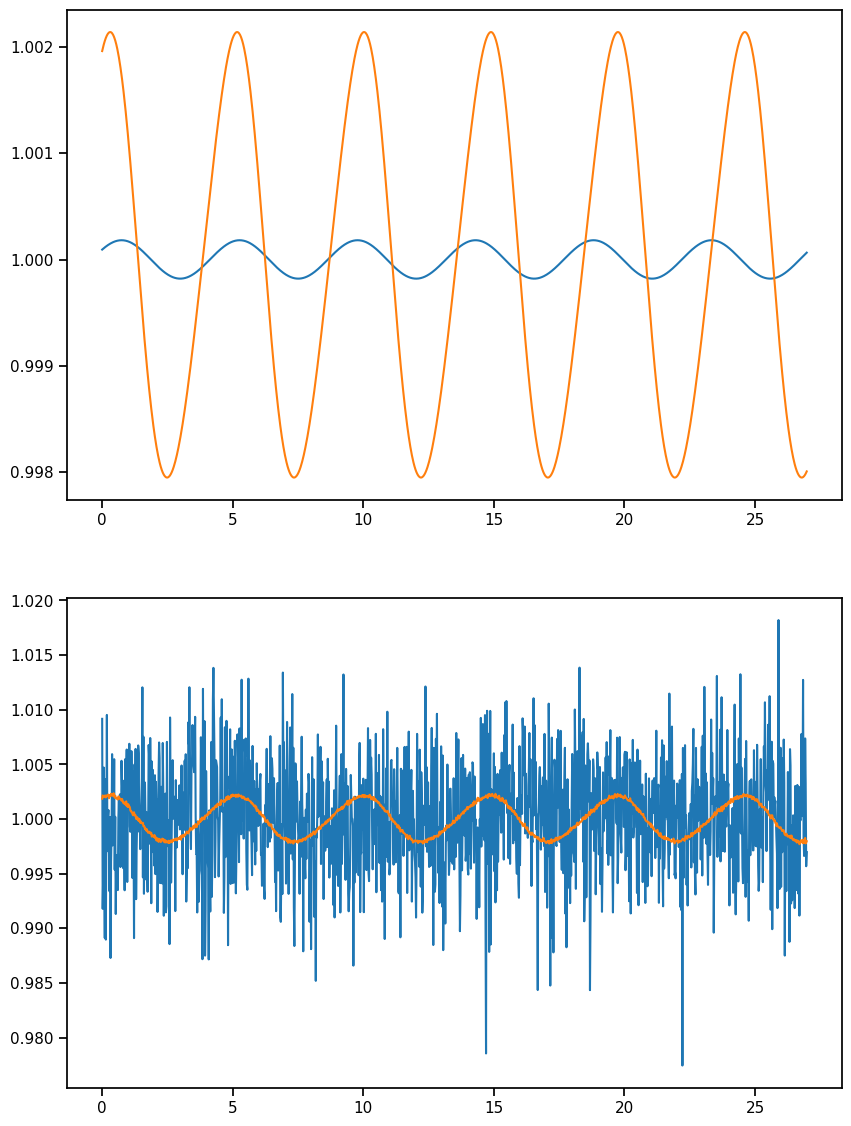

In [4]:
fig, ax = plt.subplots(2, 1, figsize=(10, 14))
ax[0].plot(t, sim.T)
ax[1].plot(t, obs.T)
plt.show()

### Test methods

In [6]:
from michael import janet

2022-10-19 16:01:21.933762: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
from michael.data import data_class
from michael import janet
gaiaid = 4984094970441940864
ra = 20.457083
dec = -42.022861

Already have data downloaded for Gaia ID 38329666836450304.
Removing 28 bad data points (out of 1196) using the TESS provided QUALITY array
Summing over 2 x 1 pixel lightcurves. Weighting=median
Removing 141 bad data points (out of 3600) using the TESS provided QUALITY array
Summing over 2 x 2 pixel lightcurves. Weighting=median
Removing 144 bad data points (out of 3534) using the TESS provided QUALITY array
Summing over 3 x 3 pixel lightcurves. Weighting=median
Removing 249 bad data points (out of 3408) using the TESS provided QUALITY array
Summing over 3 x 3 pixel lightcurves. Weighting=median
Removing 199 bad data points (out of 3278) using the TESS provided QUALITY array
Summing over 2 x 2 pixel lightcurves. Weighting=median
### Running Simple Astropy Lomb-Scargle on Sector 5 on star 38329666836450304 ###
### Completed Simple Astropy Lomb-Scargle for Sector 5 on star 38329666836450304 ###
### Running Wavelet Estimation for Sector 5 on star 38329666836450304 ###


100%|██████████████████████████████████████████| 39/39 [00:00<00:00, 131.75it/s]


### Completed Wavelet Estimation for Sector 5 on star 38329666836450304 ###
### Running Composite ACF estimation for Sector 5 on star 38329666836450304 ###
### Completed Composite ACF estimation for Sector 5 on star 38329666836450304 ###
### Running ACF Estimation on star 38329666836450304 ###
### Completed ACF Estimation for Sector 5 on star 38329666836450304 ###
### Running Simple Astropy Lomb-Scargle on Sector 32 on star 38329666836450304 ###
### Completed Simple Astropy Lomb-Scargle for Sector 32 on star 38329666836450304 ###
### Running Wavelet Estimation for Sector 32 on star 38329666836450304 ###


100%|███████████████████████████████████████████| 39/39 [00:00<00:00, 75.88it/s]


### Completed Wavelet Estimation for Sector 32 on star 38329666836450304 ###
### Running Composite ACF estimation for Sector 32 on star 38329666836450304 ###
### Completed Composite ACF estimation for Sector 32 on star 38329666836450304 ###
### Running ACF Estimation on star 38329666836450304 ###
### Completed ACF Estimation for Sector 32 on star 38329666836450304 ###
### Running Simple Astropy Lomb-Scargle on Sector 42-44 on star 38329666836450304 ###
### Completed Simple Astropy Lomb-Scargle for Sector 42-44 on star 38329666836450304 ###
### Running Wavelet Estimation for Sector 42-44 on star 38329666836450304 ###


100%|█████████████████████████████████████████| 115/115 [00:02<00:00, 39.52it/s]


### Completed Wavelet Estimation for Sector 42-44 on star 38329666836450304 ###
### Running Composite ACF estimation for Sector 42-44 on star 38329666836450304 ###
### Completed Composite ACF estimation for Sector 42-44 on star 38329666836450304 ###
### Running ACF Estimation on star 38329666836450304 ###
### Completed ACF Estimation for Sector 42-44 on star 38329666836450304 ###


/Users/oliver hall/Research/michael/michael/validate.py:303: UserWarning: One or more sectors disagree strongly across all estimates. Please inspect the results carefully yourself.
  warnings.warn("One or more sectors disagree strongly across all estimates. Please inspect the results carefully yourself.")
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequen

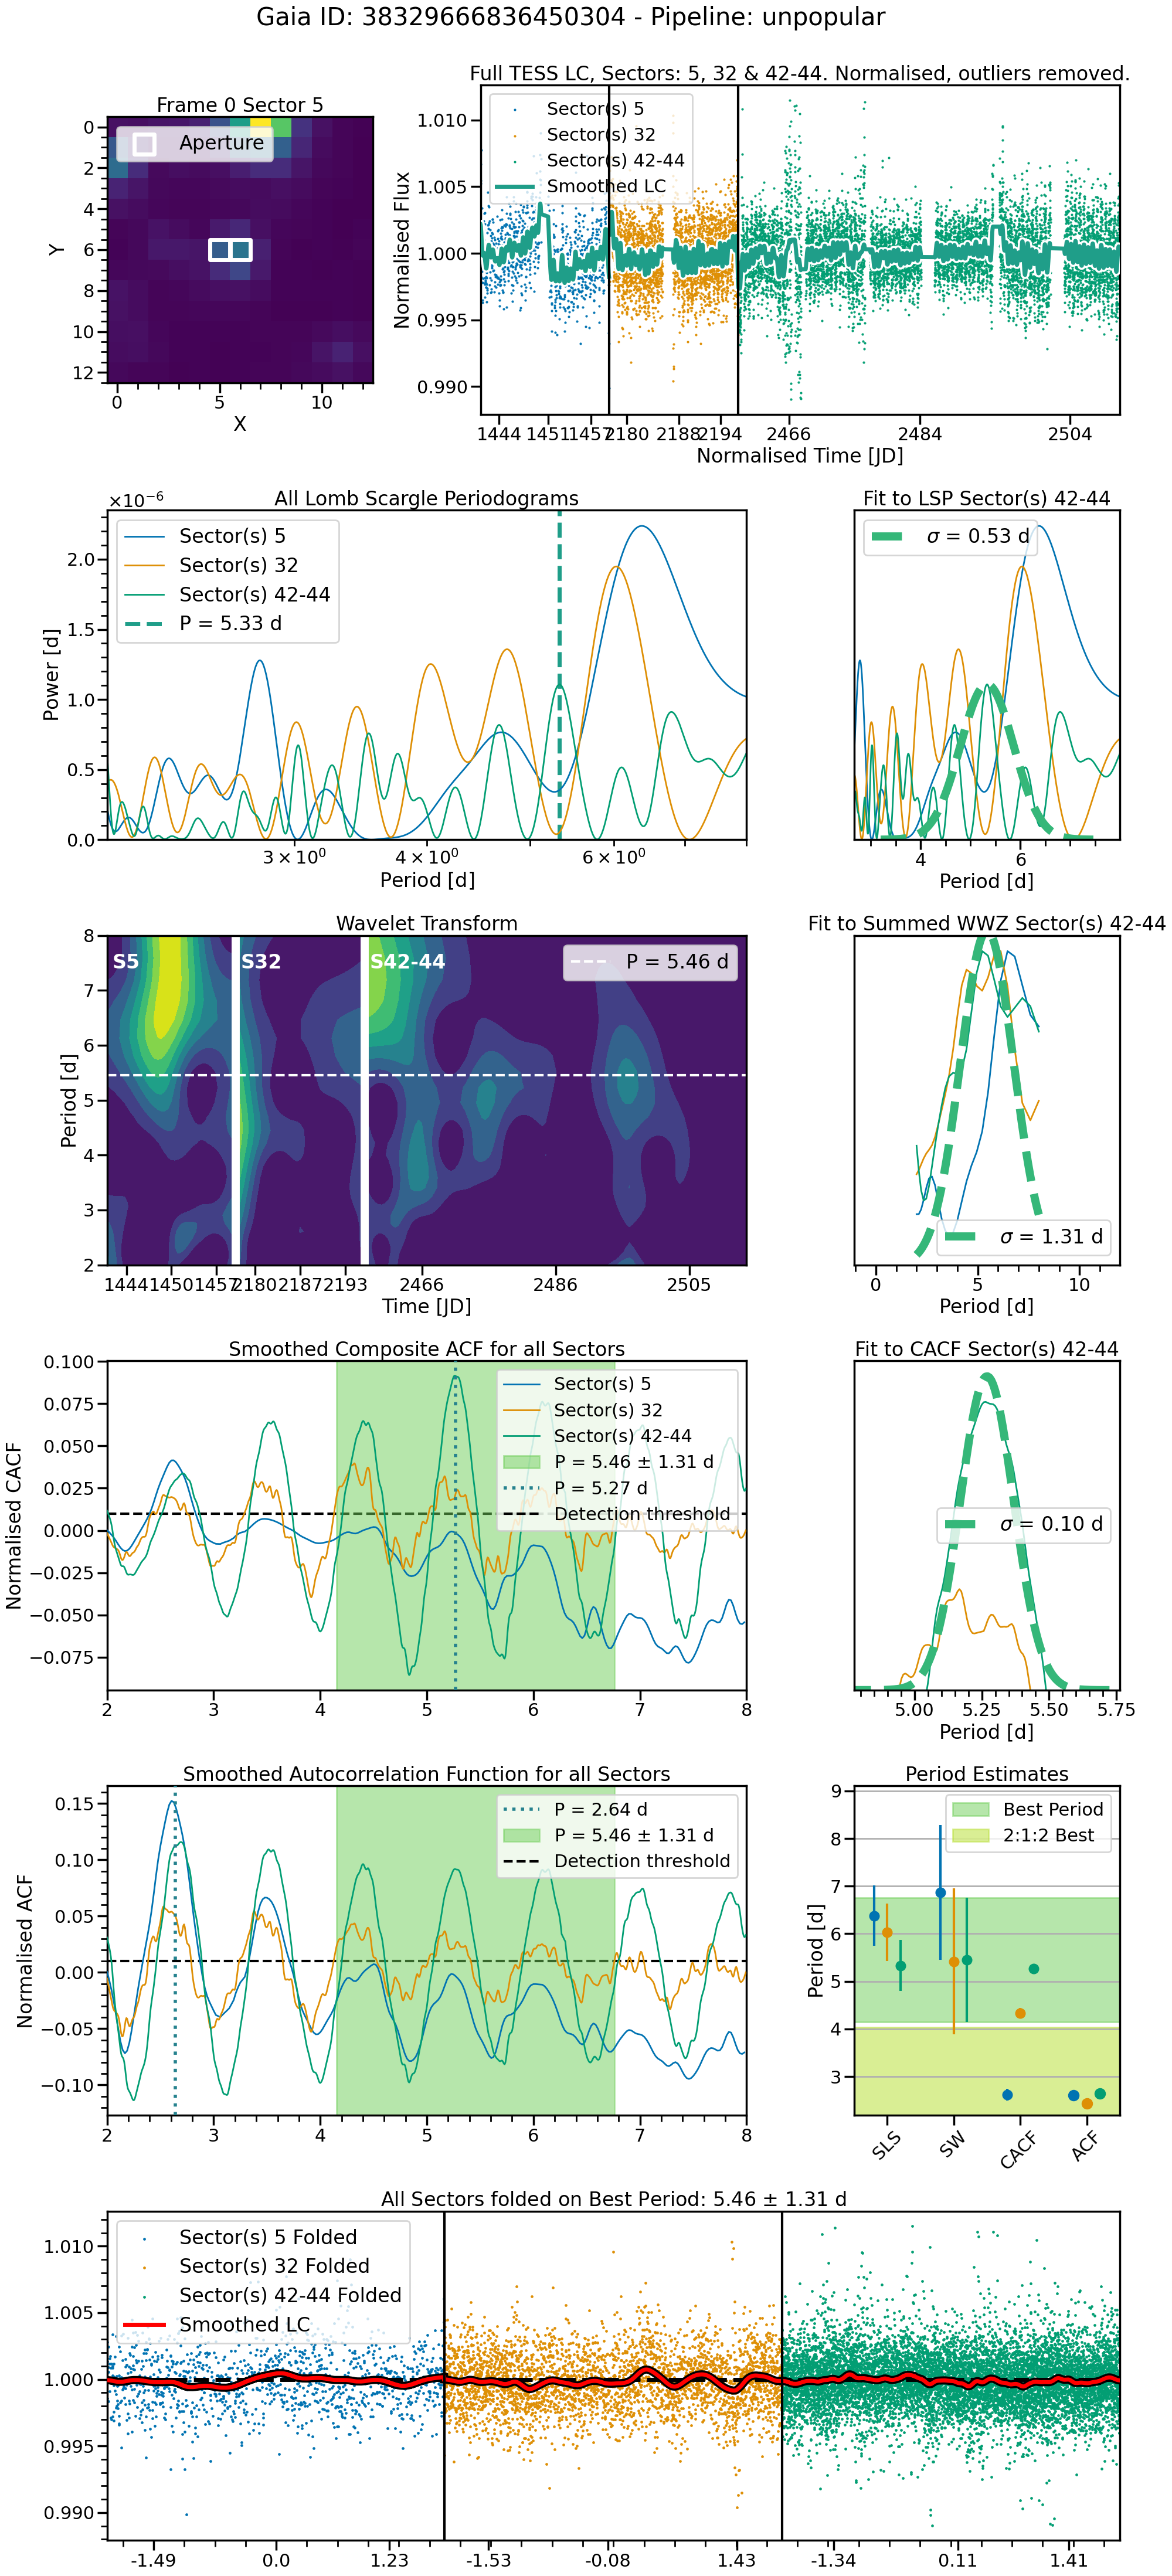

In [10]:

    j = janet(gaiaid, ra, dec, pipeline = 'unpopular', output_path = 'tests/data')
    data = data_class(j)
    data.check_eleanor_setup()
    data.build_eleanor_lc()
    data.build_unpopular_lc()
    j.get_rotation(period_range = (2, 8))
    j.validate_rotation()
    j.view()
